## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split

## Import Data & Show Data Type

In [3]:
data = pd.read_csv('Data/Premonsoon.csv')
print('NO OF ROWS AND COLUMN IN DATASET ', data.shape,'\n')
print('AFTER READING DATASET','\n',data.head())

NO OF ROWS AND COLUMN IN DATASET  (163, 25) 

AFTER READING DATASET 
    SL. For reference  Year  Season Nest Code Well Code  \
0                  1  2009       0        N3        P1   
1                  3  2010       0        N3        P1   
2                  5  2011       0        N3        P1   
3                  7  2009       0        N3        P2   
4                  9  2010       0        N3        P2   

  Depth and Color (to be used in plot and analysis)  \
0                                   Shallow - Black   
1                                              Deep   
2                                   Shallow - Black   
3                                   Shallow - White   
4                                      Intermediate   

  COLOR assigned (FOUR Color) FINAL 2013       Lat       Lon  Temp  ...  \
0                                  BLACK  23.32567  90.70171  26.7  ...   
1                              OFF-WHITE  23.32567  90.70171  27.0  ...   
2                        

## Count Null Value

In [4]:
print('COUNT NO OF NULL IN EACH COLUMN','\n',data.isnull().sum())

COUNT NO OF NULL IN EACH COLUMN 
 SL. For reference                                    0
Year                                                 0
Season                                               0
Nest Code                                            0
Well Code                                            0
Depth and Color (to be used in plot and analysis)    0
COLOR assigned (FOUR Color) FINAL 2013               0
Lat                                                  0
Lon                                                  0
Temp                                                 0
WD                                                   0
EC                                                   0
pH                                                   0
As                                                   0
Mn                                                   0
Fe                                                   0
Ca                                                   0
Q1                             

<AxesSubplot:>

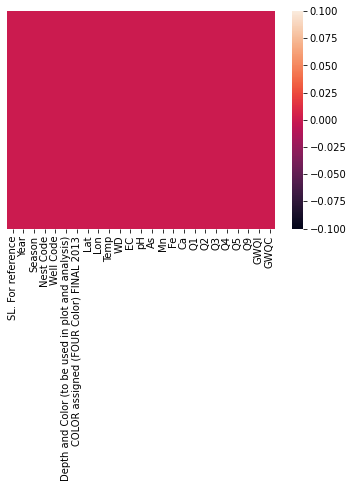

In [5]:
sns.heatmap(data.isnull(), yticklabels=False)

## Data Visualizing

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL. For reference,163.0,164.042945,95.540784,1.000000,82.000000,164.000000,247.000000,328.000000
Year,163.0,2010.067485,0.746422,2009.000000,2010.000000,2010.000000,2011.000000,2011.000000
Season,163.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lat,163.0,23.398025,0.050154,23.302840,23.368340,23.395170,23.433520,23.487560
Lon,163.0,90.694851,0.058347,90.604470,90.642360,90.701710,90.737800,90.804190
Temp,163.0,28.603067,18.566878,26.000000,26.600000,27.000000,27.650000,264.000000
WD,163.0,92.390318,81.493875,9.143554,28.954587,65.528802,111.280488,239.634146
EC,163.0,1163.723926,928.409108,248.000000,706.000000,957.000000,1330.000000,6170.000000
pH,163.0,6.950061,0.229757,6.300000,6.800000,6.900000,7.080000,7.700000
As,163.0,158.501013,197.102884,5.600000,7.304050,43.965900,293.882450,739.797400


In [7]:
display(data.dtypes)

SL. For reference                                      int64
Year                                                   int64
Season                                                 int64
Nest Code                                             object
Well Code                                             object
Depth and Color (to be used in plot and analysis)     object
COLOR assigned (FOUR Color) FINAL 2013                object
Lat                                                  float64
Lon                                                  float64
Temp                                                 float64
WD                                                   float64
EC                                                     int64
pH                                                   float64
As                                                   float64
Mn                                                   float64
Fe                                                   float64
Ca                      

In [8]:
le = LabelEncoder()

data['Season'] = le.fit_transform(data['Season'])
data['Nest Code'] = le.fit_transform(data['Nest Code'])
data['Well Code'] = le.fit_transform(data['Well Code'])
data['Depth and Color (to be used in plot and analysis)'] = le.fit_transform(data['Depth and Color (to be used in plot and analysis)'])
data['COLOR assigned (FOUR Color) FINAL 2013'] = le.fit_transform(data['COLOR assigned (FOUR Color) FINAL 2013'])
data['GWQC'] = le.fit_transform(data['GWQC'])


In [9]:
display(data.dtypes)

SL. For reference                                      int64
Year                                                   int64
Season                                                 int64
Nest Code                                              int32
Well Code                                              int32
Depth and Color (to be used in plot and analysis)      int32
COLOR assigned (FOUR Color) FINAL 2013                 int32
Lat                                                  float64
Lon                                                  float64
Temp                                                 float64
WD                                                   float64
EC                                                     int64
pH                                                   float64
As                                                   float64
Mn                                                   float64
Fe                                                   float64
Ca                      

In [10]:
corr=data.corr()
corr.nlargest(15,'GWQI')['GWQI']

GWQI         1.000000
Mn           0.898632
Q4           0.898628
Fe           0.590948
Q5           0.590947
Q9           0.479585
Ca           0.479585
As           0.181362
Q3           0.181362
Lon          0.102247
Temp         0.037313
EC           0.019408
Q1           0.019408
WD           0.014591
Nest Code   -0.002193
Name: GWQI, dtype: float64

In [11]:
df = data.copy(deep = True)
df.drop(["SL. For reference","Q1","Q2","Q3","Q4","Q5","Q9","GWQC"],axis=1,inplace=True)
display(df.dtypes)

Year                                                   int64
Season                                                 int64
Nest Code                                              int32
Well Code                                              int32
Depth and Color (to be used in plot and analysis)      int32
COLOR assigned (FOUR Color) FINAL 2013                 int32
Lat                                                  float64
Lon                                                  float64
Temp                                                 float64
WD                                                   float64
EC                                                     int64
pH                                                   float64
As                                                   float64
Mn                                                   float64
Fe                                                   float64
Ca                                                   float64
GWQI                    

In [12]:
df.rename(columns=({ 'Depth and Color (to be used in plot and analysis)': 'Depth&Color', 
                    'Nest Code': 'NC','COLOR assigned (FOUR Color) FINAL 2013':'Color'}), inplace=True)

In [13]:
corr=df.corr()
corr.nlargest(15,'GWQI')['GWQI']

GWQI           1.000000
Mn             0.898632
Fe             0.590948
Ca             0.479585
As             0.181362
Lon            0.102247
Temp           0.037313
EC             0.019408
WD             0.014591
NC            -0.002193
Depth&Color   -0.021105
Color         -0.028183
Lat           -0.125617
Year          -0.139567
pH            -0.224236
Name: GWQI, dtype: float64

In [14]:
corel = df.corr()
corel.style.background_gradient()

C:\Users\amisk\anaconda3\envs\jupyterlab\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\amisk\anaconda3\envs\jupyterlab\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Year,Season,NC,Well Code,Depth&Color,Color,Lat,Lon,Temp,WD,EC,pH,As,Mn,Fe,Ca,GWQI
Year,1.000000,nan,-0.181079,0.275062,0.058712,-0.081981,-0.130968,-0.014747,0.001588,-0.039043,-0.184191,0.293328,-0.080479,-0.098853,-0.130074,-0.105130,-0.139567
Season,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NC,-0.181079,nan,1.000000,0.002276,-0.081553,0.084434,0.194746,0.265528,0.097047,0.110794,0.061964,0.052073,0.020349,0.080872,-0.157419,-0.056225,-0.002193
Well Code,0.275062,nan,0.002276,1.000000,-0.085971,-0.044651,-0.008754,-0.011404,-0.071184,0.075183,-0.042406,-0.096512,-0.657026,-0.234168,-0.372896,-0.332736,-0.368762
Depth&Color,0.058712,nan,-0.081553,-0.085971,1.000000,-0.293044,0.020693,0.034836,0.022105,-0.703194,-0.009724,0.151006,0.097844,-0.076117,0.089715,0.048064,-0.021105
Color,-0.081981,nan,0.084434,-0.044651,-0.293044,1.000000,0.003929,0.021386,-0.058543,0.578094,0.060438,-0.093701,-0.053928,0.003279,-0.067866,0.059703,-0.028183
Lat,-0.130968,nan,0.194746,-0.008754,0.020693,0.003929,1.000000,-0.436636,0.065457,-0.020562,0.096835,0.002181,0.041830,-0.182860,0.053876,-0.093846,-0.125617
Lon,-0.014747,nan,0.265528,-0.011404,0.034836,0.021386,-0.436636,1.000000,-0.096617,-0.022148,0.023822,-0.072822,-0.045471,0.108125,0.032989,0.054050,0.102247
Temp,0.001588,nan,0.097047,-0.071184,0.022105,-0.058543,0.065457,-0.096617,1.000000,-0.059518,-0.038881,0.018518,0.112318,0.051082,-0.015642,0.149669,0.037313
WD,-0.039043,nan,0.110794,0.075183,-0.703194,0.578094,-0.020562,-0.022148,-0.059518,1.000000,-0.000332,-0.113237,-0.090752,0.056304,-0.067847,-0.020458,0.014591


In [15]:
df.drop(["Well Code","Lon","Temp","WD","Depth&Color","NC","Color","Lat","Year","pH"],axis=1,inplace=True)
df.head()

,Season,EC,As,Mn,Fe,Ca,GWQI
0,0,930,452.3784,1.3095,3.9103,153.3078,1318.57
1,0,830,422.0694,1.2437,4.4859,146.1369,1313.99
2,0,960,430.7686,1.0599,3.3528,127.6802,1087.14
3,0,1100,227.5254,0.7266,9.0259,79.1177,1290.90
4,0,1000,265.9830,0.6248,9.8024,103.3628,1281.96


## Dataset divide into Input & Output Data & Then Train_Test_Split

In [16]:
x = df.drop('GWQI', axis = 1)
y = df['GWQI']
x.head()

,Season,EC,As,Mn,Fe,Ca
0,0,930,452.3784,1.3095,3.9103,153.3078
1,0,830,422.0694,1.2437,4.4859,146.1369
2,0,960,430.7686,1.0599,3.3528,127.6802
3,0,1100,227.5254,0.7266,9.0259,79.1177
4,0,1000,265.9830,0.6248,9.8024,103.3628


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Using Multiple Linear Regression Model

In [18]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

In [19]:
#Predicting the value
y_pred_test = regressor.predict(x_test)

y_pred_train = regressor.predict(x_train)

## Check R2 Score & RMSE Score

In [20]:
from sklearn.metrics import r2_score

print('Goodness of Fit(R Square Value)  FOR TEST DATA ',r2_score(y_test, y_pred_test))

print('Goodness of Fit(R Square Value)  FOR TRAIN DATA ',r2_score(y_train, y_pred_train))

Goodness of Fit(R Square Value)  FOR TEST DATA  0.999999695065642
Goodness of Fit(R Square Value)  FOR TRAIN DATA  0.9999996575347884


In [21]:
from sklearn.metrics import mean_squared_error

print('MEAN SQUARED ERROR FOR TRAIN DATA ', mean_squared_error(y_train, y_pred_train))

print ('MEAN SQUARED ERROR FOR TEST DATA ', mean_squared_error(y_test, y_pred_test))

import math

print('RMSE ERROR VALUE  FOR TRAIN DATA ',math.sqrt(mean_squared_error(y_train, y_pred_train)))

print('RMSE ERROR VALUE  FOR TEST DATA ',math.sqrt(mean_squared_error(y_test, y_pred_test)))

MEAN SQUARED ERROR FOR TRAIN DATA  0.1584571775849475
MEAN SQUARED ERROR FOR TEST DATA  0.22176773556229515
RMSE ERROR VALUE  FOR TRAIN DATA  0.3980668004053434
RMSE ERROR VALUE  FOR TEST DATA  0.47092221816590385


## Lasso Regression Model

In [22]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)

model_lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [23]:
y_pred_train_lasso= model_lasso.predict(x_train)

y_pred_test_lasso= model_lasso.predict(x_test)

## Check R2 Score & RMSE Score

In [24]:
from sklearn.metrics import r2_score

print('Goodness of Fit(R Square Value)  FOR TRAIN DATA ',r2_score(y_train, y_pred_train_lasso))
print('Goodness of Fit(R Square Value)  FOR TEST DATA ',r2_score(y_test, y_pred_test_lasso))

Goodness of Fit(R Square Value)  FOR TRAIN DATA  0.9999996288845626
Goodness of Fit(R Square Value)  FOR TEST DATA  0.999999586948706


In [25]:
from sklearn.metrics import mean_squared_error

print('MEAN SQUARED ERROR FOR TRAIN DATA ', mean_squared_error(y_train, y_pred_train_lasso))

print ('MEAN SQUARED ERROR FOR TEST DATA ', mean_squared_error(y_test, y_pred_test_lasso))

import math

print('RMSE ERROR VALUE  FOR TRAIN DATA ',math.sqrt(mean_squared_error(y_train, y_pred_train_lasso)))

print('RMSE ERROR VALUE  FOR TEST DATA ',math.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))

MEAN SQUARED ERROR FOR TRAIN DATA  0.1717135135394843
MEAN SQUARED ERROR FOR TEST DATA  0.3003972747930004
RMSE ERROR VALUE  FOR TRAIN DATA  0.41438329302649773
RMSE ERROR VALUE  FOR TEST DATA  0.5480850981307559


## ElasticNet Regression Model

In [26]:
from sklearn.linear_model import ElasticNet

model_enet = ElasticNet(alpha = 0.01)

model_enet.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [27]:
y_pred_train_enet= model_enet.predict(x_train)

y_pred_test_enet= model_enet.predict(x_test)

## Check R2 Score & RMSE Score

In [28]:
from sklearn.metrics import r2_score

print('Goodness of Fit(R Square Value)  FOR TRAIN DATA ',r2_score(y_train, y_pred_train_enet))
print('Goodness of Fit(R Square Value)  FOR TEST DATA ',r2_score(y_test, y_pred_test_enet))

Goodness of Fit(R Square Value)  FOR TRAIN DATA  0.999940594795486
Goodness of Fit(R Square Value)  FOR TEST DATA  0.9999249505015126


In [29]:
from sklearn.metrics import mean_squared_error

print('MEAN SQUARED ERROR FOR TRAIN DATA ', mean_squared_error(y_train, y_pred_train_enet))

print ('MEAN SQUARED ERROR FOR TEST DATA ', mean_squared_error(y_test, y_pred_test_enet))

import math

print('RMSE ERROR VALUE  FOR TRAIN DATA ',math.sqrt(mean_squared_error(y_train, y_pred_train_enet)))

print('RMSE ERROR VALUE  FOR TEST DATA ',math.sqrt(mean_squared_error(y_test, y_pred_test_enet)))

MEAN SQUARED ERROR FOR TRAIN DATA  27.48653212064728
MEAN SQUARED ERROR FOR TEST DATA  54.58078730972506
RMSE ERROR VALUE  FOR TRAIN DATA  5.2427599716797335
RMSE ERROR VALUE  FOR TEST DATA  7.387881110963079


# FOR PREMONSOON MULTI LINEAR REGRESSION IS BEST MODEL

In [30]:
import pickle
filename = open('premonqipredict.pkl', 'wb')
pickle.dump(regressor,filename )

In [31]:
filename.close()